In [66]:
import pandas as pd 
df=pd.read_csv('D:/namhyunji/python/project_/result_1/Seoul_above_user_average.csv')
df.head()



,weekday,weekend,weather_find,weather_rain_snow,weather_hot,weather_cold,above_user_average
0,1,0,0,0,0,1,0
1,1,0,1,0,0,0,1
2,1,0,1,0,0,0,1
3,1,0,1,0,0,0,1
4,0,1,1,0,0,0,1


In [67]:
train_cols=df.columns[:6]
X=df[train_cols]
y=df['above_user_average']
y.value_counts()

1    636
0    455
Name: above_user_average, dtype: int64

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='above_user_average', ylabel='count'>

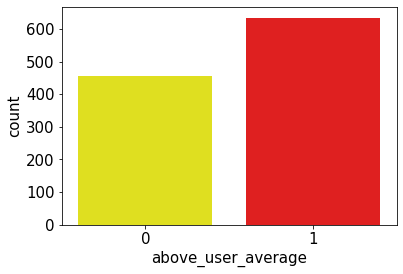

In [68]:
import seaborn as sns 
colors=['yellow','red']
sns.countplot('above_user_average', data=df, palette=colors)

In [69]:
from imblearn.under_sampling import RandomUnderSampler 
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['above_user_average'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

#언더 샘플링

In [70]:
df_samp.above_user_average.value_counts()

0    455
1    455
Name: above_user_average, dtype: int64

In [71]:
X=df_samp[train_cols]
y=df_samp['above_user_average']

In [72]:
import statsmodels.discrete.discrete_model as sm

model=sm.Logit(y,X)
result=model.fit()
#result=model.fit(method='bfgs')
result.summary2()

#r-squared값은 ppt에 넣지 말죠 ㅎㅎ(23%)
#p-value 0.0157 / Coef -2.2780  주말(weekend)에는 지하철이용자가 평균이하이다
#날씨와 지하철이용은 관계없다


Optimization terminated successfully.
         Current function value: 0.529566
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit              Pseudo R-squared: 0.236     
Dependent Variable: above_user_average AIC:              975.8105  
Date:               2022-07-15 17:10   BIC:              1004.6912 
No. Observations:   910                Log-Likelihood:   -481.91   
Df Model:           5                  LL-Null:          -630.76   
Df Residuals:       904                LLR p-value:      3.1003e-62
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     6.0000                                         
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
weekday              0.4356   0.9235  0.4717 0.6371 -1.3743  2.2456
weekend             -2.2780   0.9427 -2.4166 0.0157 -4.1256 -0.4304
weather_find         0.6284   0.9290  0.6764 0.4988 -1.1925  2.4492
weather_rain_snow   -0.3695   0.9006 -0.4103 0.6816 -2.1347  1.3956
weather_hot         -0.8894   0.8590 -1.0355 0.3005 -2.5730  0.7941
weather_cold        -0.9813   1.0230 -0.9593 0.3374 -2.9863  1.0236
===================================================================

"""

In [73]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [74]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(random_state=10, max_iter=1000)
logit.fit(X_train,y_train)
print(logit.score(X_train,y_train))
print(logit.score(X_test,y_test))
#정확도 0.75


0.7554945054945055
0.7747252747252747


<AxesSubplot:>

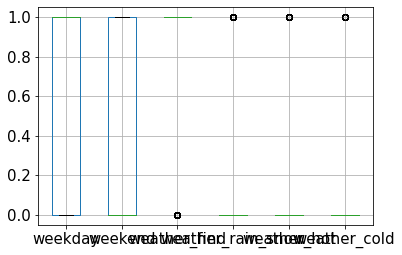

In [75]:
X_train.boxplot()

In [76]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train))
X_test_scaled=pd.DataFrame(scaler.transform(X_test))

#0,1로 전처리하였기 때문에 스케일링필요x

<AxesSubplot:>

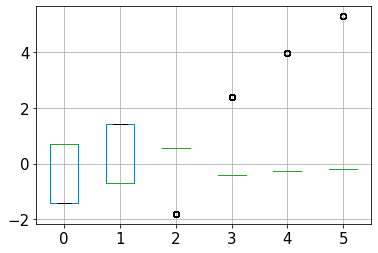

In [77]:
X_train_scaled.boxplot()

In [78]:
result_tr=[]
result_te=[]

In [79]:
logit=LogisticRegression(random_state=10)
a=logit.fit(X_train_scaled, y_train)


In [80]:
score_tr=logit.score(X_train_scaled, y_train)
score_te=logit.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

#스케일링한 정확도와 하지않은 정확도 같음

0.7554945054945055
0.7747252747252747


In [81]:
from sklearn.tree import DecisionTreeClassifier 
tree=DecisionTreeClassifier(random_state=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [82]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.7554945054945055
0.7747252747252747


In [83]:
tree=DecisionTreeClassifier(random_state=10,max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [84]:
score_tr=tree.score(X_train, y_train)
score_te=tree.score(X_test, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.7554945054945055
0.7747252747252747


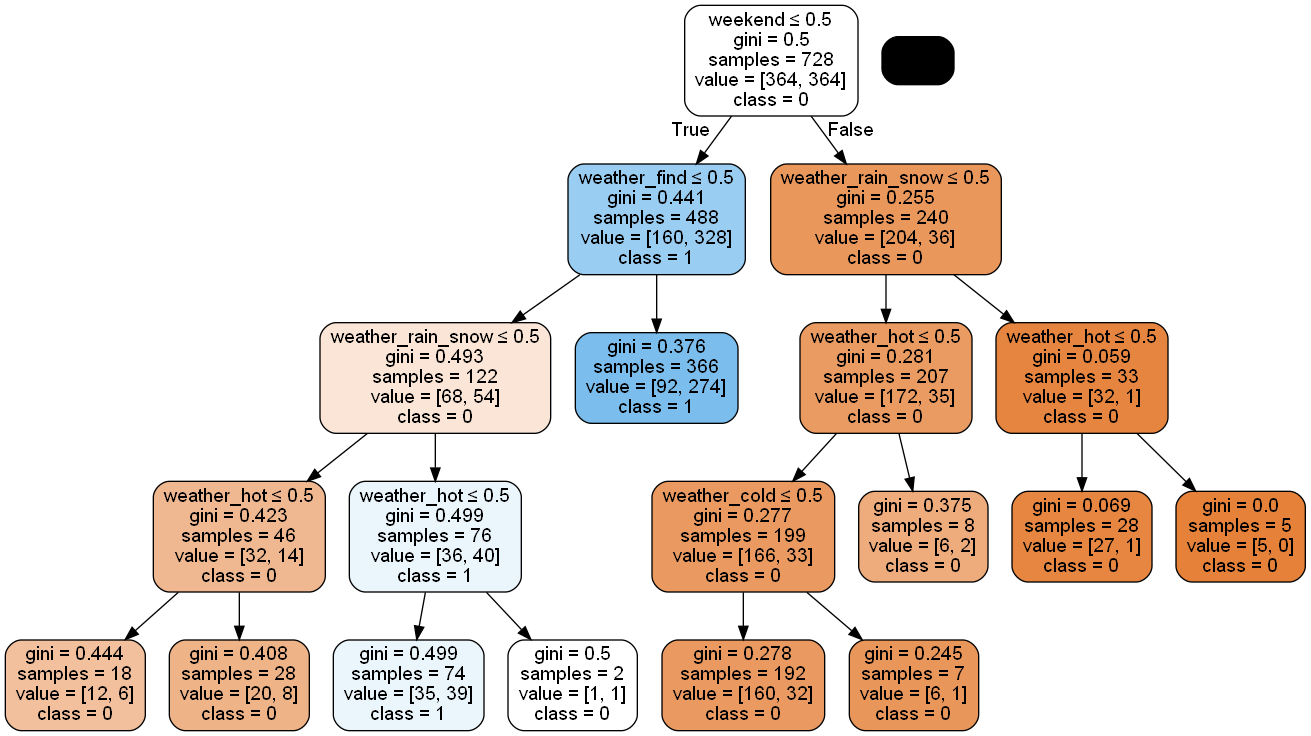

In [85]:
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image 
dot_data=export_graphviz(tree, out_file=None, feature_names=train_cols, class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#weekend 주말이 가장 중요도가 높음

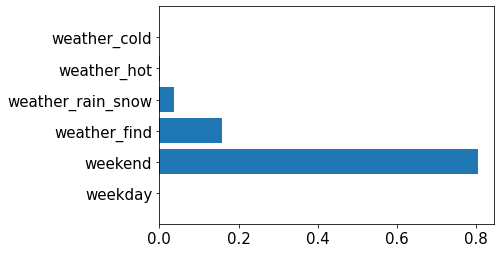

In [86]:
import numpy as np 
import matplotlib.pyplot as plt 
def plot_tree(model):
    n_features=X.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),train_cols)
    plt.ylim(-1,n_features)
plot_tree(tree)    

In [87]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [88]:
score_tr=forest.score(X_train, y_train)
score_te=forest.score(X_test, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.7554945054945055
0.7747252747252747


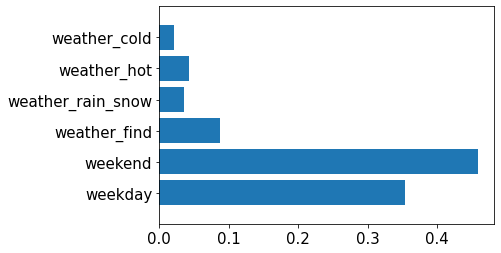

In [89]:
plot_tree(forest)

최적의 k: 2
최고 정확도: 0.7747252747252747


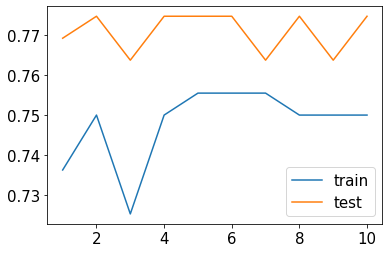

In [90]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate=[]
test_rate=[]
neighbors=range(1,11)
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_rate.append(knn.score(X_train, y_train))
    test_rate.append(knn.score(X_test, y_test))
test_arr=np.array(test_rate)    
max_rate=np.max(test_arr)
idx=np.where(test_arr == max_rate)[0][0]
print('최적의 k:',neighbors[idx])
print('최고 정확도:', test_rate[idx])
plt.plot(neighbors, train_rate, label='train')
plt.plot(neighbors, test_rate, label='test')
plt.legend()
plt.show()

#최적의 k: 2 최고 정확도: 0.7747252747252747

In [91]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [92]:
score_tr=knn.score(X_train, y_train)
score_te=knn.score(X_test, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.75
0.7747252747252747


In [93]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=10)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=10)

In [94]:
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.7554945054945055
0.7747252747252747


In [95]:
mlp=MLPClassifier(random_state=10,max_iter=1000,hidden_layer_sizes=[100,100])
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[100, 100], max_iter=1000, random_state=10)

In [96]:
score_tr=mlp.score(X_train, y_train)
score_te=mlp.score(X_test, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.7554945054945055
0.7747252747252747


In [97]:
from sklearn.svm import SVC 
svm=SVC(random_state=10)
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.7554945054945055
0.7747252747252747


In [98]:
import numpy as np 
train_rate=[]
test_rate=[]
c_values=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values=[0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        svm=SVC(C=n, gamma=g, random_state=10)
        svm.fit(X_train, y_train)
        train_rate.append([n,g,svm.score(X_train, y_train)])
        test_rate.append([n,g,svm.score(X_test, y_test)])

최적의 c: 1
최적의 gamma: 0.1
최고 정확도: 0.7747252747252747


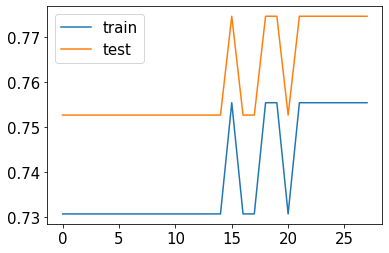

In [99]:
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2])
idx=np.argmax(test_arr[:,2])
print('최적의 c:', test_rate[idx][0])
print('최적의 gamma:', test_rate[idx][1])
print('최고 정확도:', test_rate[idx][2])
plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='test')
plt.legend()
plt.show()

#최적의 c: 1 최적의 gamma: 0.1 최고 정확도: 0.7747252747252747

In [100]:
svm=SVC(C=1, gamma=0.1, random_state=10)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=10)

In [101]:
score_tr=svm.score(X_train, y_train)
score_te=svm.score(X_test, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.7554945054945055
0.7747252747252747


최적의 모형: LOGIT
최고 정확도: 0.7747252747252747


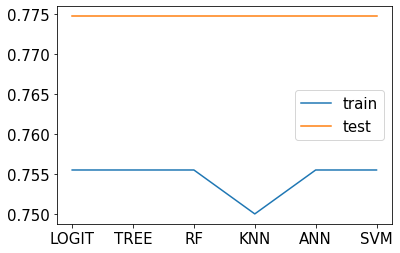

['LOGIT', 'TREE', 'RF', 'KNN', 'ANN', 'SVM']
[0.7747252747252747, 0.7747252747252747, 0.7747252747252747, 0.7747252747252747, 0.7747252747252747, 0.7747252747252747]


In [102]:
methods=['LOGIT','TREE','RF','KNN','ANN','SVM']
result_tr_arr=np.array(result_tr)
max_rate_tr=np.max(result_tr_arr)
idx_tr=np.argmax(result_tr_arr)

result_te_arr=np.array(result_te)
max_rate_te=np.max(result_te_arr)
idx_te=np.argmax(result_te_arr)

print('최적의 모형:', methods[idx_te])
print('최고 정확도:', max_rate_te)
plt.rcParams['font.size']=15
plt.plot(methods, result_tr_arr, label='train')
plt.plot(methods, result_te_arr, label='test')
plt.legend()
plt.show()
print(methods)
print(result_te)

In [103]:
from mlxtend.frequent_patterns import apriori
itemset = apriori(df, use_colnames=True)
itemset

d:\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.717690,(weekday)
1,0.771769,(weather_find)
2,0.582951,(above_user_average)
3,0.549954,"(weekday, weather_find)"
4,0.534372,"(weekday, above_user_average)"


In [104]:
from mlxtend.frequent_patterns import association_rules
association_rules(itemset, metric="confidence", min_threshold=0.1) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(weekday),(weather_find),0.717690,0.771769,0.549954,0.766284,0.992892,-0.003937,0.976529
1,(weather_find),(weekday),0.771769,0.717690,0.549954,0.712589,0.992892,-0.003937,0.982251
2,(weekday),(above_user_average),0.717690,0.582951,0.534372,0.744572,1.277246,0.115994,1.632745
3,(above_user_average),(weekday),0.582951,0.717690,0.534372,0.916667,1.277246,0.115994,3.387718


In [105]:
from   mlxtend.frequent_patterns   import    apriori
frequent   =   apriori(df,    min_support=0.5,    use_colnames=True) 
frequent

d:\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.717690,(weekday)
1,0.771769,(weather_find)
2,0.582951,(above_user_average)
3,0.549954,"(weekday, weather_find)"
4,0.534372,"(weekday, above_user_average)"


In [106]:
from mlxtend.frequent_patterns import association_rules 
rules=association_rules(frequent, metric='confidence', min_threshold=0.2)
rules

#(weekday)	(above_user_average) 평일과 탑승객이상과 연관규칙이있음

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(weekday),(weather_find),0.717690,0.771769,0.549954,0.766284,0.992892,-0.003937,0.976529
1,(weather_find),(weekday),0.771769,0.717690,0.549954,0.712589,0.992892,-0.003937,0.982251
2,(weekday),(above_user_average),0.717690,0.582951,0.534372,0.744572,1.277246,0.115994,1.632745
3,(above_user_average),(weekday),0.582951,0.717690,0.534372,0.916667,1.277246,0.115994,3.387718
